## Avacado Project
### Problem Statement:
Avocado is a fruit consumed by people heavily in the United States. 
#### Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 
The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 
The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.
##### Some relevant columns in the dataset:
•	Date - The date of the observation
•	AveragePrice - the average price of a single avocado
•	type - conventional or organic
•	year - the year
•	Region - the city or region of the observation
•	Total Volume - Total number of avocados sold
•	4046 - Total number of avocados with PLU 4046 sold
•	4225 - Total number of avocados with PLU 4225 sold
•	4770 - Total number of avocados with PLU 4770 sold

##### Inspiration /Label 
The dataset can be seen in two angles to find the region and find the average price .
Task: One of Classification and other of Regression
Do both tasks in the same .ipynb file and submit at single file. 
To download the dataset, use the link given below. 
##### Downlaod Files:
•	https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/avocado.csv.zip


# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

import warnings
warnings.filterwarnings('ignore')

## Load the dataset

In [2]:
df = pd.read_csv(r"C:\Users\dell\Desktop\Data Trained Projects\Project 4\avocado.csv")
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


##### Observations:
Features:
* Unnamed: 0
* Date
* Total Volume
* 4046
* 4225
* 4770
* Total Bage
* Small Bags
* Large Bags
* XLarge Bags
* type
* year
* region

Label/Output:
* AveragePrice

## Shape of the Dataset

In [3]:
df.shape

(18249, 14)

The dataset contains 18249 rows and 14 columns

## Check the concise summary of the dataframe

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


##### Observation:
Here we can observe that:
* The columns are having three different datatypes
* Datatypes - 
              1. AveragePrice, Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, XLarge Bags  = float64
              2. Unnamed: 0, year = int64
              3. Date, type, region = object


## Check Null Values

In [5]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

The dataset contain no null values

## Check for statistical summary of the dataframe

In [6]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


##### Observation: 
* maximum price of avacado is 3.25 dollars and the lowest price is 0.44 with no 0 price.

Here, Unnamed: 0 is an unnecessary feature, lets drop it first.

In [7]:
df=df.drop('Unnamed: 0', axis = 1)

## Let's check the unique variables of some of the features

In [8]:
df.type.unique()

array(['conventional', 'organic'], dtype=object)

In [9]:
df.year.unique()

array([2015, 2016, 2017, 2018], dtype=int64)

In [10]:
df.region.unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

## Let's Check for any duplicates

In [11]:
df.duplicated().sum()

0

# Exploratory Data Analysis (EDA)

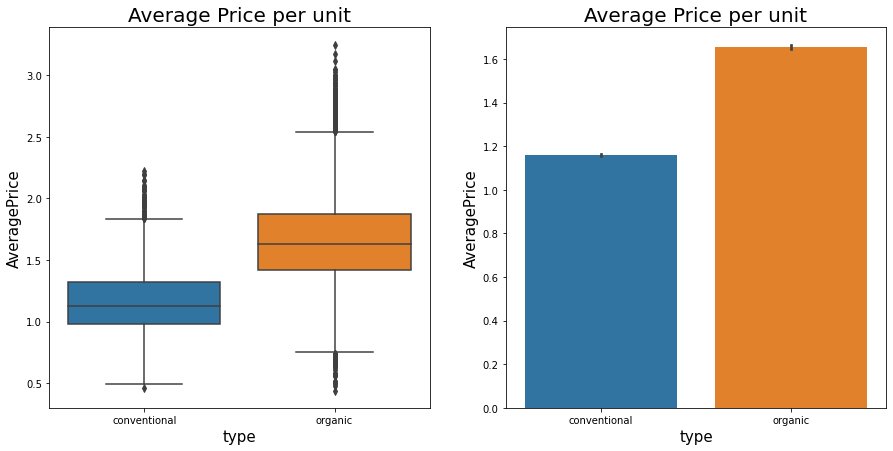

In [12]:
# compare the prices of the two types and identify any outliers
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.xlabel("Type of Avacado", fontsize=15)
plt.ylabel("Average Price", fontsize=15) 
plt.title("Average Price per unit", fontsize=20)
sns.boxplot(x='type', y='AveragePrice', data=df)
plt.subplot(1,2,2)
plt.xlabel("Type of Avacado", fontsize=15)
plt.ylabel("Average Price", fontsize=15) 
plt.title("Average Price per unit", fontsize=20)
sns.barplot(x='type', y='AveragePrice', data=df)

plt.show()

##### Observations:
The organic are generaly more expensive which is quite expected now that many people are going the organic way, hence there is a higher demand and I guess it must be more expensive to grow organic avocados. The organic seems to have outliers on both ends, which we can look into later. The conventional type has outliers on the higher side.

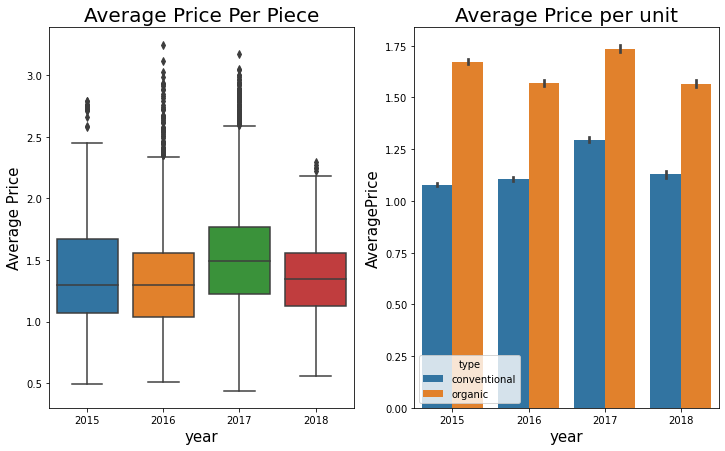

In [13]:
# compare the price over the four years and identify any outliers
plt.figure(figsize = (12,7))
plt.subplot(1,2,1)
sns.boxplot(x="year", y="AveragePrice",data=df)
plt.title("Average Price Per Piece",fontsize = 20)
plt.xlabel('year',fontsize = 15)
plt.ylabel('Average Price',fontsize = 15)
plt.subplot(1,2,2)
plt.xlabel("year", fontsize=15)
plt.ylabel("Average Price", fontsize=15) 
plt.title("Average Price per unit", fontsize=20)
sns.barplot(x='year', y='AveragePrice', data=df, hue='type')
plt.show()

Seems like the mean price was generally higher in 2017

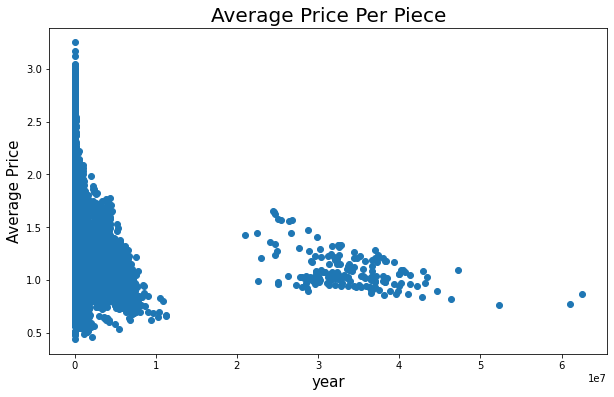

In [14]:
plt.figure(figsize=(10,6))
plt.scatter(x=df['Total Volume'], y=df['AveragePrice'])
plt.title("Average Price Per Piece",fontsize = 20)
plt.xlabel('year',fontsize = 15)
plt.ylabel('Average Price',fontsize = 15)
plt.show()

#### Correlation Matrix: 
* what is the relationship between the price and the rest of the features
* Is there a correlation
* Perform correlation

In [15]:
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000


Lets plot heatmap to visualize better.

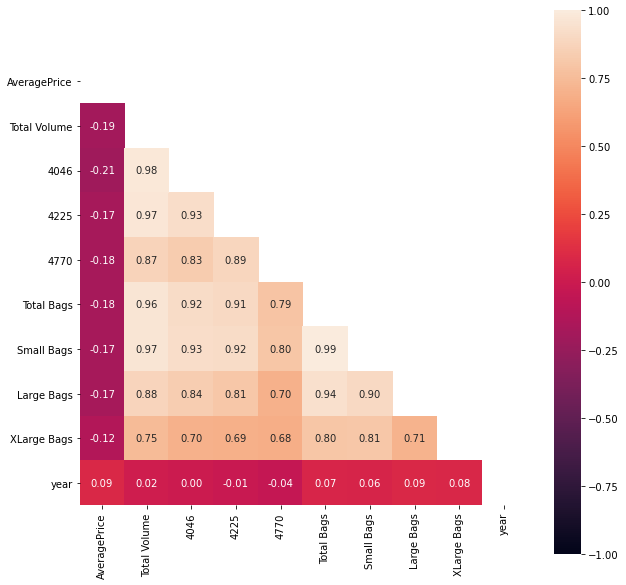

In [16]:
plt.figure(figsize=(10,10))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), vmin=-1, vmax=1, mask=matrix,square=True, annot=True, fmt='.2f')
plt.show()

We start learning more about price, interesting to see that there is 'less' correlation with the total volume,however look further into maybe each year.

## Data Pre-pocessing and Feature Engineering

'Label Encoding' for the categorical features

In [17]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['type'] = label.fit_transform(df['type'])
df['region'] = label.fit_transform(df['region'])

Convert Date from object to a datetime

In [18]:
import datetime as dt
df.Date= pd.to_datetime(df.Date) 
df.Date.dt.month
df["Month"]= df.Date.dt.month

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  int32         
 11  year          18249 non-null  int64         
 12  region        18249 non-null  int32         
 13  Month         18249 non-null  int64         
dtypes: datetime64[ns](1), float64(9), int32(2), int64(2)
memory usage: 1.8 MB


Get month from 'Date' and drop the column.

In [20]:
df['Month'] = pd.to_datetime(df['Date']).dt.month
df.drop('Date', axis=1, inplace=True)

In [21]:
df.sample(10)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
3345,1.07,168757.98,71113.29,34419.80,2593.07,60631.82,57069.78,1842.04,1720.00,0,2016,10,8
531,0.90,145305.65,57480.41,39207.76,24724.80,23892.68,16946.85,4765.93,2179.90,0,2015,10,10
14215,1.26,33199.26,557.91,13292.78,29.22,19319.35,7549.44,11769.91,0.00,1,2016,43,2
4218,1.26,225721.51,133593.96,30401.95,102.91,61622.69,45125.04,15814.59,683.06,0,2016,27,11
11096,1.73,5749.75,56.66,2117.25,855.40,2720.44,2635.69,84.75,0.00,1,2015,37,2
8286,1.49,367628.08,241771.30,49334.31,107.12,76415.35,14979.73,53594.51,7841.11,0,2017,50,8
12085,1.58,18287.57,719.74,5525.36,327.28,11715.19,2472.00,9243.19,0.00,1,2016,2,1
15340,1.81,24831.19,8554.15,657.97,0.00,15619.07,15605.74,13.33,0.00,1,2017,11,9
16131,2.17,7071.72,60.89,2903.35,0.00,4107.48,2453.39,1654.09,0.00,1,2017,26,10
16255,2.06,112812.77,17822.91,52648.14,1178.91,41162.81,39892.76,1270.05,0.00,1,2017,28,6


In [22]:
df.shape

(18249, 13)

In [23]:
df.type.unique()

array([0, 1])

In [24]:
df.region.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53])

##### Observation:
* Encoded features 'type' and 'regions' into numbers
* now the shape changes to - 18249 rows × 13 columns
* Change the datatype of 'Date' to datetime64 from object
* Extracted 'Month' form 'Date' and drop the column 'Date'.

## Modelling

In [25]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('AveragePrice', axis=1)
y = df['AveragePrice']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

In [26]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((14599, 12), (14599,), (3650, 12), (3650,))

### Linear Regression

In [27]:
model = LinearRegression()
model.fit(X_train, y_train)
print('Train Score : ',model.score(X_train, y_train))
print('Test Score : ',model.score(X_test, y_test))

Train Score :  0.4360807772287405
Test Score :  0.44742253199362836


### Ridge

In [28]:
model = Ridge()
model.fit(X_train, y_train)
print('Train Score : ',model.score(X_train, y_train))
print('Test Score : ',model.score(X_test, y_test))

Train Score :  0.4359547324954488
Test Score :  0.44725183374577715


### Gradient Boost

In [29]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
print('Train Score : ',model.score(X_train, y_train))
print('Test Score : ',model.score(X_test, y_test))

Train Score :  0.7669841670211491
Test Score :  0.7539532491954314


### K-Nearest Neighbors

In [30]:
model = KNeighborsRegressor()
model.fit(X_train, y_train)
print('Train Score : ',model.score(X_train, y_train))
print('Test Score : ',model.score(X_test, y_test))

Train Score :  0.8726710772723946
Test Score :  0.7629915254662694


### Random Forest

In [31]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
print('Train Score : ',model.score(X_train, y_train))
print('Test Score : ',model.score(X_test, y_test))

Train Score :  0.9847858439229421
Test Score :  0.8885718487917755


### Decision Tree

In [32]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
print('Train Score : ',model.score(X_train, y_train))
print('Test Score : ',model.score(X_test, y_test))

Train Score :  1.0
Test Score :  0.7572161977253117


## Hyperparameter Tuning

In [33]:
from sklearn.model_selection import GridSearchCV

models = []
scores = []

### Ridge

In [34]:
param_grid = {'alpha' : [0.0001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}
model = Ridge()

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
ridge_score = grid_search.score(X_test, y_test)

print('Test Score :',ridge_score)
print('Best Parameters :',grid_search.best_params_)
print('Best CV Score :',grid_search.best_score_)

models.append('Ridge')
scores.append(ridge_score)

Test Score : 0.4472570396476234
Best Parameters : {'alpha': 0.0001}
Best CV Score : 0.435134174068646


### Gradient Boost

In [35]:
param_grid = {'max_depth' : [2, 3, 4, 5, 6, 7, 8, 9]}
model = GradientBoostingRegressor()

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
gb_score = grid_search.score(X_test, y_test)

print('Test Score :',gb_score)
print('Best Parameters :', grid_search.best_params_)
print('Best CV Score :', grid_search.best_score_)

models.append('Gradient Boost')
scores.append(gb_score)

Test Score : 0.9120840183687182
Best Parameters : {'max_depth': 9}
Best CV Score : 0.9025508963632548


### K-Nearest Neighbors

In [36]:
param_grid = {'n_neighbors' : range(1, 20)}
model = KNeighborsRegressor()

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
knr_score = grid_search.score(X_test, y_test)

print('Test Score :',knr_score)
print('Best Parameters :', grid_search.best_params_)
print('Best CV Score :',grid_search.best_score_)

models.append('K-Nearest Neighbors')
scores.append(knr_score)

Test Score : 0.874625076514077
Best Parameters : {'n_neighbors': 1}
Best CV Score : 0.8323722632725383


### Random Forest

In [37]:
param_grid = {'max_depth' : [5, 10, 15, 20, 25, 30]}
model = RandomForestRegressor()

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
rf_score = grid_search.score(X_test, y_test)

print('Test Score :',rf_score)
print('Best Parameters :', grid_search.best_params_)
print('Best CV Score :',grid_search.best_score_)

models.append('Random Forest')
scores.append(rf_score)

Test Score : 0.8894021219914318
Best Parameters : {'max_depth': 25}
Best CV Score : 0.8802991512605237


### Decision Tree

In [38]:
param_grid = {'max_depth' : range(2, 20), "min_samples_leaf" : range(2, 10)}
model = DecisionTreeRegressor()

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
dt_score = grid_search.score(X_test, y_test)

print('Test Score :',dt_score)
print('Best Parameters :', grid_search.best_params_)
print('Best CV Score :',grid_search.best_score_)

models.append('Decision Tree')
scores.append(dt_score)

Test Score : 0.7880801205519193
Best Parameters : {'max_depth': 19, 'min_samples_leaf': 6}
Best CV Score : 0.776817300099618


## Result

In [39]:
df_result = pd.DataFrame({'Model' : models, 'Score' : scores})
df_result

,Model,Score
0,Ridge,0.447257
1,Gradient Boost,0.912084
2,K-Nearest Neighbors,0.874625
3,Random Forest,0.889402
4,Decision Tree,0.788080


## Saving the best model

In [40]:
import joblib
joblib.dump(gb_score,'Avacado Project.pkl')

['Avacado Project.pkl']

Gradient Boost shows the best test and cv score